In [34]:
#Import thư viện
import pandas as pd
import matplotlib.pyplot as plt #visualization
import seaborn as sns #visualization
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,f1_score,precision_score,recall_score
import sklearn.metrics as metrics
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE

In [35]:
#Import dữ liệu 
wine = pd.read_csv('winequality-red.csv', sep = ';')
wine.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [68]:
#Kiểm tra số lượng dữ liệu
print("Number of rows: ", wine.shape[0])
print("Number of columns: ", wine.shape[1], "\n")

print("Data Types: ",wine.dtypes, "\n")

#Kiểm Tra dữ liệu thiếu
print("Missing values:")
print(wine[wine.columns.tolist()].isnull().sum())


Number of rows:  1359
Number of columns:  9 

Data Types:  fixed acidity           float64
volatile acidity        float64
citric acid             float64
chlorides               float64
total sulfur dioxide    float64
density                 float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object 

Missing values:
fixed acidity           0
volatile acidity        0
citric acid             0
chlorides               0
total sulfur dioxide    0
density                 0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [37]:
#Kiểm tra dữ liệu trùng
print("Duplicated values: ", wine[wine.columns.tolist()].duplicated().sum())

Duplicated values:  240


In [38]:
#Xóa dữ liệu trùng
wine.drop_duplicates(inplace=True)
#Kiểm tra lần dữ liệu trùng lần 2
print("Duplicated values: ", wine[wine.columns.tolist()].duplicated().sum())

Duplicated values:  0


In [39]:
#Kiểm tra số lượng của từng nhãn trong quality
print("Amount of data per quality: ")
print(wine["quality"].value_counts())

Amount of data per quality: 
quality
5    577
6    535
7    167
4     53
8     17
3     10
Name: count, dtype: int64


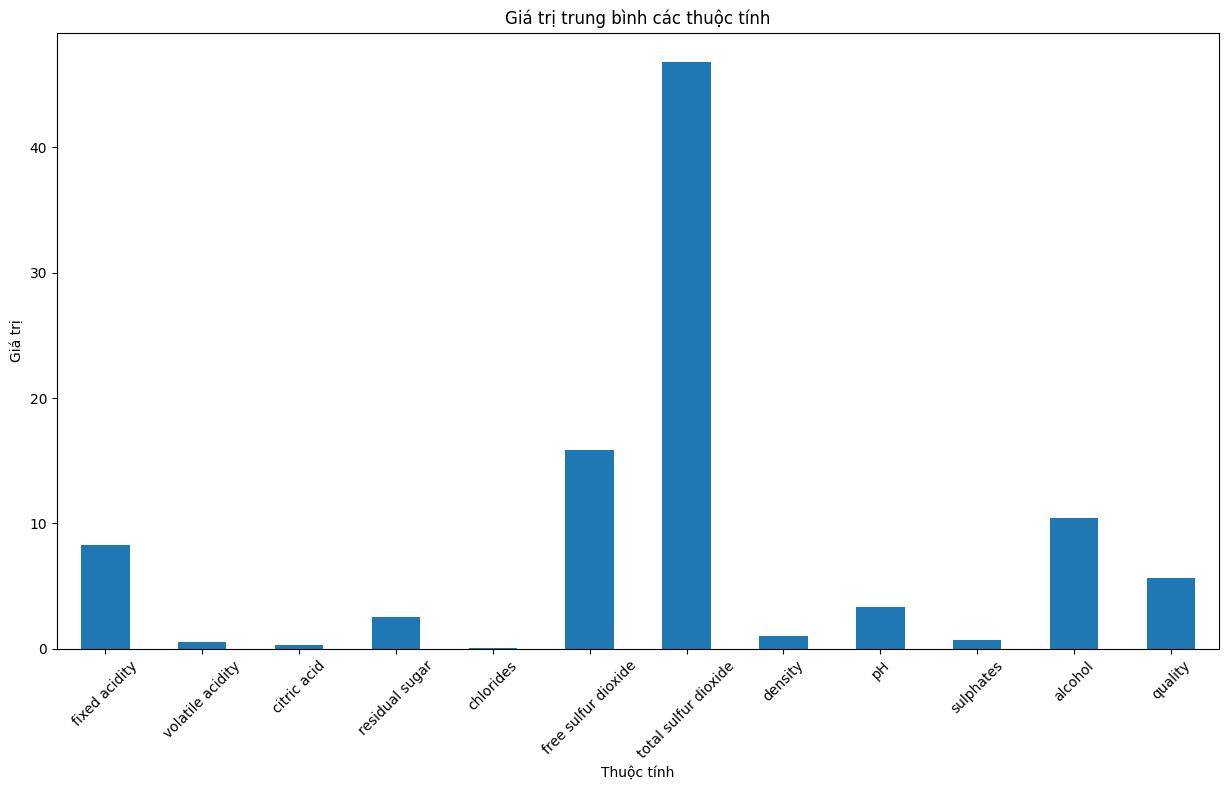

In [40]:
#Biểu đồ giá trị trung bình từng thuộc tính
attributes = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide',	'total sulfur dioxide',	'density','pH','sulphates','alcohol', 'quality']
mean_values = wine[attributes].mean()
plt.figure(figsize = (15,8))
mean_values.plot(kind = 'bar')
plt.title('Giá trị trung bình các thuộc tính')
plt.xlabel('Thuộc tính')
plt.ylabel('Giá trị')
plt.xticks(rotation = 45)
plt.show()

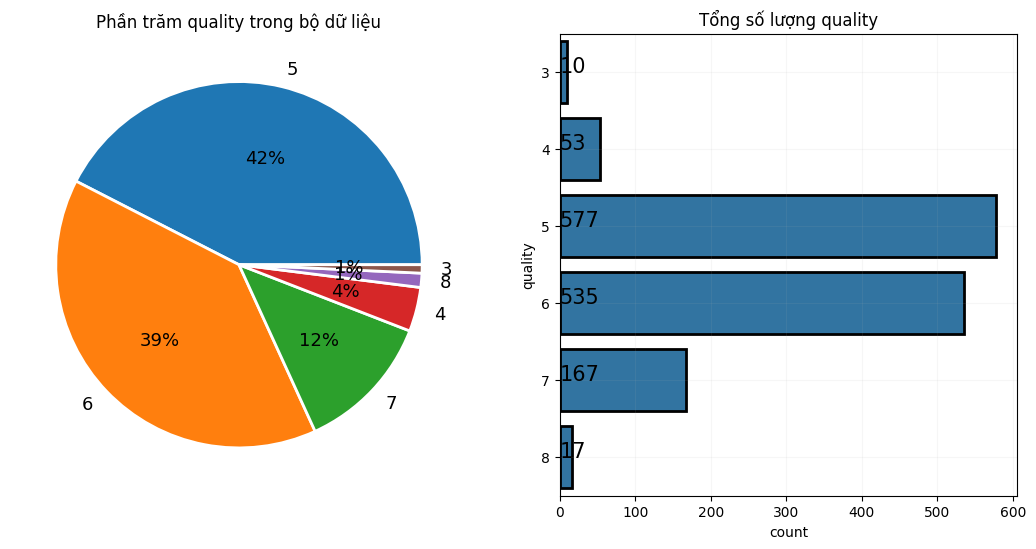

In [41]:
#Biểu đồ tỉ trọng các thuộc tính
plt.figure(figsize=(13,6))
plt.subplot(121)
wine["quality"].value_counts().plot.pie(autopct  = "%1.0f%%",
                                        fontsize = 13,
                                        wedgeprops = {"linewidth" : 2,
                                                      "edgecolor" : "w"},
                                       )
plt.title("Phần trăm quality trong bộ dữ liệu")
plt.ylabel("")
plt.subplot(122)
ax = sns.countplot(y = wine["quality"],linewidth = 2,
                   edgecolor = "k")
for i,j in enumerate(wine["quality"].value_counts().values) :
    if i == 0:
        ax.text(.1,2,j,fontsize = 15,color = "k")  # Fix: Use "black" instead of "k"
    if i ==1:
        ax.text(.1,3,j,fontsize = 15,color = "k")
    if i == 2:
        ax.text(.1,4,j,fontsize = 15,color = "k")
    if i == 3:
        ax.text(.1,1,j,fontsize = 15,color = "k")
    if i == 4:
        ax.text(.1,5,j,fontsize = 15,color = "k")
    if i == 5:
        ax.text(.1,0,j,fontsize = 15,color = "k")
plt.title("Tổng số lượng quality")
plt.grid(True,alpha = .1)
plt.show()

quality                 1.000000
alcohol                 0.480343
sulphates               0.248835
citric acid             0.228057
fixed acidity           0.119024
residual sugar          0.013640
free sulfur dioxide    -0.050463
pH                     -0.055245
chlorides              -0.130988
total sulfur dioxide   -0.177855
density                -0.184252
volatile acidity       -0.395214
Name: quality, dtype: float64


Text(0.5, 1.0, 'Biểu đồ độ tương quan')

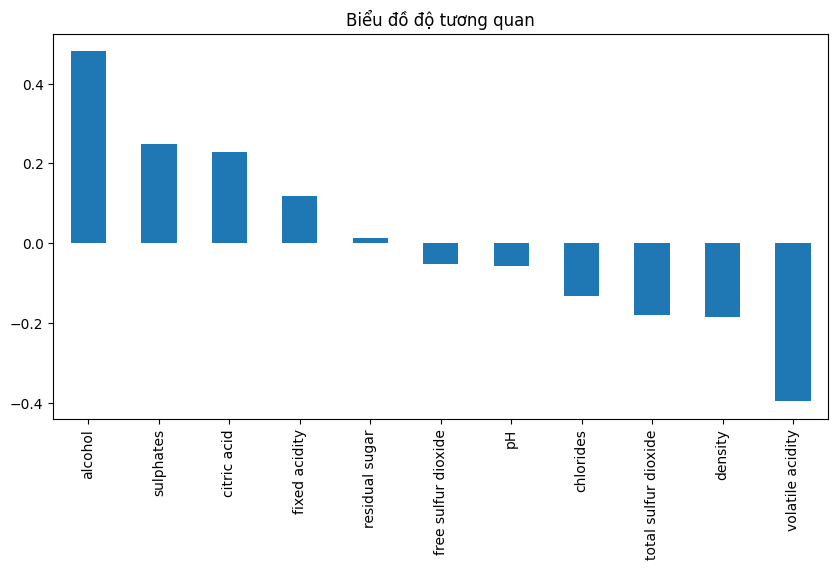

In [42]:
#Do tuong quan giua cac thuoc tinh voi quality
correlation=wine.corr()
print(correlation['quality'].sort_values(ascending=False))
correlation['quality'].drop('quality').sort_values(ascending=False).plot(kind='bar',figsize=(10,5))
plt.title("Biểu đồ độ tương quan")


In [43]:
#Bỏ các thuộc tính với độ tương quan thấp
wine = wine.drop(['residual sugar', 'free sulfur dioxide', 'pH'], axis=1)

In [44]:
#Chia tập test và train
X=wine.drop('quality', axis = 1)
y=wine['quality']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state= 2)
y_train.value_counts()
X_test #Sử dụng để chạy thử chức năng trong ứng dụng

,fixed acidity,volatile acidity,citric acid,chlorides,total sulfur dioxide,density,sulphates,alcohol
1584,6.7,0.320,0.44,0.061,34.0,0.99484,0.80,11.6
1127,6.3,0.760,0.00,0.072,52.0,0.99379,0.60,11.5
77,6.8,0.785,0.00,0.104,30.0,0.99660,0.55,10.7
307,10.3,0.410,0.42,0.213,14.0,0.99940,0.62,9.5
1288,7.0,0.600,0.30,0.068,110.0,0.99914,1.17,10.2
...,...,...,...,...,...,...,...,...
101,7.8,0.500,0.30,0.075,22.0,0.99590,0.56,10.4
560,12.7,0.600,0.49,0.075,19.0,0.99940,0.57,11.4
756,6.3,0.980,0.01,0.057,33.0,0.99488,0.46,11.2
782,9.0,0.820,0.05,0.081,96.0,0.99814,0.53,10.0


In [45]:
#Chuẩn hóa dữ liệu
std = StandardScaler()
X_train = std.fit_transform(X_train)
X_test =  std.transform(X_test)

Text(0, 0.5, 'Testing Accuracy')

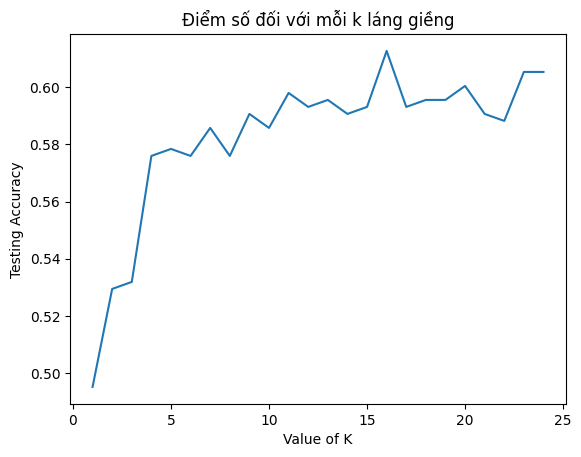

In [46]:
#Tìm k
kvals=range(1,25)
scores={}
scores_list=[]
for k in kvals:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    scores[k]=metrics.accuracy_score(y_test,y_pred)
    scores_list.append(metrics.accuracy_score(y_test,y_pred))

plt.plot(kvals,scores_list)
plt.title("Điểm số đối với mỗi k láng giềng")
plt.xlabel("Value of K")
plt.ylabel("Testing Accuracy")

In [47]:
#Train lần 1
model = KNeighborsClassifier(n_neighbors= 16)
model.fit(X_train, y_train)
pred = model.predict(X_test)
score = accuracy_score(y_test,pred)
print(score)

0.6127450980392157


In [48]:
#Thống kê kết quả lần 1
print("Thống kê quality dự đoán và thực tế")
pd.DataFrame({'Predict':pred, 'Actual':y_test})

Thống kê quality dự đoán và thực tế


,Predict,Actual
1584,7,7
1127,6,6
77,5,6
307,6,6
1288,5,5
...,...,...
101,5,6
560,6,5
756,6,6
782,5,5


In [49]:
#Confusion matrix lần 1
conf_matrix = metrics.confusion_matrix(y_test, pred)
conf_matrix

array([[  0,   0,   4,   0,   0,   0],
       [  0,   0,  10,   7,   0,   0],
       [  0,   0, 123,  53,   0,   0],
       [  0,   0,  43, 104,  10,   0],
       [  0,   0,   0,  25,  23,   0],
       [  0,   0,   0,   3,   3,   0]], dtype=int64)

In [50]:
#Báo cáo kết quả lần 1
print(metrics.classification_report(y_test, pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00        17
           5       0.68      0.70      0.69       176
           6       0.54      0.66      0.60       157
           7       0.64      0.48      0.55        48
           8       0.00      0.00      0.00         6

    accuracy                           0.61       408
   macro avg       0.31      0.31      0.31       408
weighted avg       0.58      0.61      0.59       408



C:\Users\ADMIN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ADMIN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ADMIN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classificati

Text(50.722222222222214, 0.5, 'Predicted label')

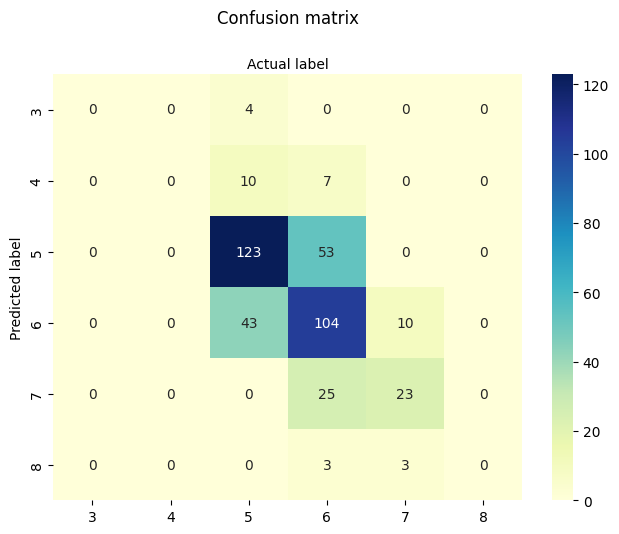

In [51]:
# Tạo heatmap
class_names=[3,4,5,6,7,8]
fig, ax = plt.subplots()
sns.heatmap(pd.DataFrame(conf_matrix),xticklabels = class_names,yticklabels = class_names, annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.xlabel('Actual label')
plt.ylabel('Predicted label')

In [52]:
#Cân bằng dữ liệu
os =SMOTE(random_state=0)
os_X_train,os_y_train= os.fit_resample(X_train,y_train)
os_y_train.value_counts()

quality
5    401
6    401
4    401
8    401
7    401
3    401
Name: count, dtype: int64

Text(0, 0.5, 'Testing Accuracy')

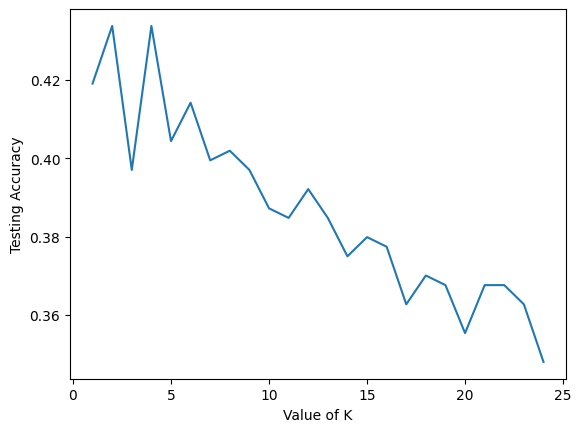

In [53]:
#Tìm k
kvals=range(1,25)
scores={}
scores_list=[]
for k in kvals:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(os_X_train,os_y_train)
    y_pred=knn.predict(X_test)
    scores[k]=metrics.accuracy_score(y_test,y_pred)
    scores_list.append(metrics.accuracy_score(y_test,y_pred))
plt.plot(kvals,scores_list)
plt.xlabel("Value of K")
plt.ylabel("Testing Accuracy")

In [54]:
#Train lần 2
new_model = KNeighborsClassifier(n_neighbors= 4)
new_model.fit(os_X_train, os_y_train)
new_pred = new_model.predict(X_test)
new_score = accuracy_score(y_test,new_pred)
print(new_score)


0.4338235294117647


In [55]:
#Kiểm tra kết quả dự đoán lần 2
unique, counts = np.unique(new_pred, return_counts=True)
print("Number of observations:")
print(dict(zip(unique, counts)))
pd.DataFrame({'Predict':new_pred, 'Actual':y_test})

Number of observations:
{3: 19, 4: 53, 5: 131, 6: 90, 7: 92, 8: 23}


,Predict,Actual
1584,7,7
1127,6,6
77,4,6
307,3,6
1288,4,5
...,...,...
101,6,6
560,4,5
756,4,6
782,5,5


In [56]:
#Báo cáo kết quả lần 2
print(metrics.classification_report(y_test, new_pred))

              precision    recall  f1-score   support

           3       0.11      0.50      0.17         4
           4       0.06      0.18      0.09        17
           5       0.65      0.48      0.55       176
           6       0.57      0.32      0.41       157
           7       0.35      0.67      0.46        48
           8       0.17      0.67      0.28         6

    accuracy                           0.43       408
   macro avg       0.32      0.47      0.33       408
weighted avg       0.54      0.43      0.46       408



In [57]:
#Confusion matrix lần 2
new_conf_matrix = metrics.confusion_matrix(y_test, new_pred)
new_conf_matrix

array([[ 2,  0,  2,  0,  0,  0],
       [ 1,  3,  8,  3,  2,  0],
       [13, 27, 85, 30, 18,  3],
       [ 3, 20, 33, 51, 38, 12],
       [ 0,  3,  3,  6, 32,  4],
       [ 0,  0,  0,  0,  2,  4]], dtype=int64)

In [58]:
y_test.value_counts()

quality
5    176
6    157
7     48
4     17
8      6
3      4
Name: count, dtype: int64

Text(50.722222222222214, 0.5, 'Predicted label')

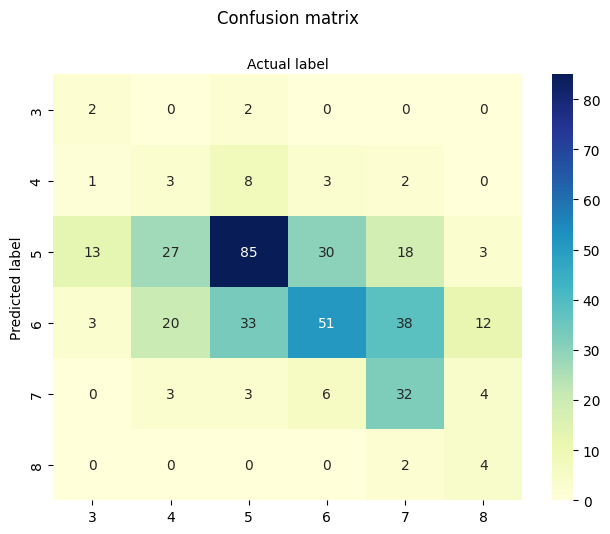

In [59]:
# Tạo heatmap
class_names=[3,4,5,6,7,8] # Quality
fig, ax = plt.subplots()
sns.heatmap(pd.DataFrame(new_conf_matrix),xticklabels = class_names,yticklabels = class_names, annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.xlabel('Actual label')
plt.ylabel('Predicted label')